## Exercise 1: Simulation experiments and KDE

### Question 1

In [33]:
import numpy as np
import matplotlib.pyplot as plt
#from sklearn.neighbors import KernelDensity
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") #to ignore warnings that the kde plots raise

(a) For a kernel K = 1[−1,1]/2, compute and display the graph of the resulting KDE obtained with different
bandwidth values h ∈ H = {10^{−5} , 10^{−3} , 10^{−1} , 10}.

What do you see?

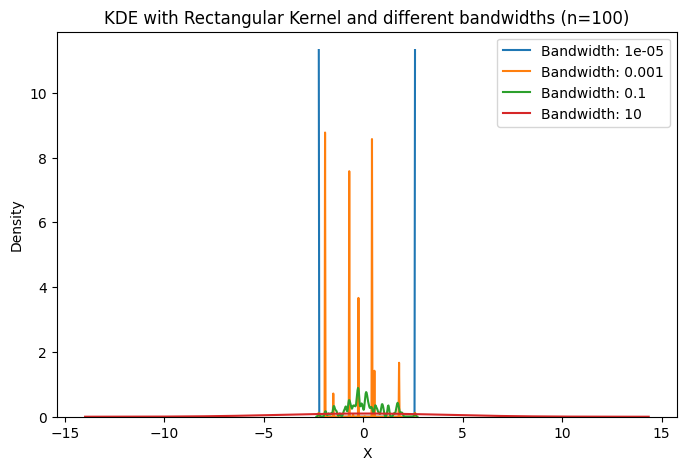

In [36]:
# Define a function to compute and plot the KDE of a given realisation X with a kernel K = 1[−1,1]/2
def KDE_rectangle_plot(X, n):
    # Bandwidth values
    H = [10**(-5), 10**(-3), 10**(-1), 10]

    # Compute and plot KDE for each bandwidth value
    plt.figure(figsize=(8, 5))
    for i, h in enumerate(H):
      sns.kdeplot(X, bw_adjust=h, kernel='tophat', label=f'Bandwidth: {h}')

    plt.title(f'KDE with Rectangular Kernel and different bandwidths (n={n})')
    plt.xlabel('X')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

# Draw one realization of n = 100 independent random variables X1,...,Xn from a standard Gaussian distribution N(0,1)
n = 100
X = np.random.normal(0, 1, n)

# Compute and plot the KDE
KDE_rectangle_plot(X, n)


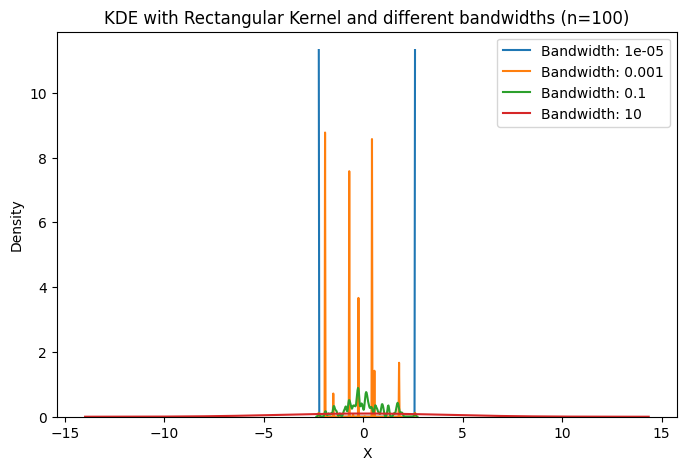

In [ ]:
# Define a function to compute and plot the KDE of a given realisation X with a kernel K = 1[−1,1]/2
def KDE_rectangle_plot(X, n):
    # Bandwidth values
    H = [10**(-5), 10**(-3), 10**(-1), 10]

    # Compute and plot KDE for each bandwidth value
    plt.figure(figsize=(8, 5))
    for i, h in enumerate(H):
      sns.kdeplot(X, bw_adjust=h, kernel='tophat', label=f'Bandwidth: {h}')

    plt.title(f'KDE with Rectangular Kernel and different bandwidths (n={n})')
    plt.xlabel('X')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

# Draw one realization of n = 100 independent random variables X1,...,Xn from a standard Gaussian distribution N(0,1)
n = 100
X = np.random.normal(0, 1, n)

# Compute and plot the KDE
KDE_rectangle_plot(X, n)


(b) Repeat the same experiment with n = 10 000. Is there a change? Comment.

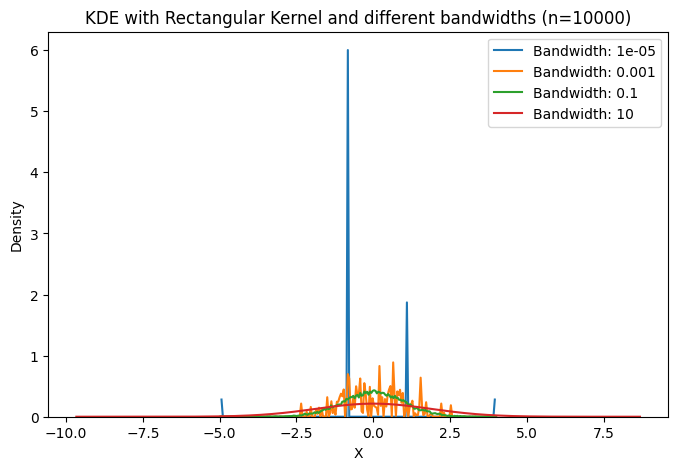

In [41]:
n_2 = 10000
X_2 = np.random.normal(0, 1, n_2)

KDE_rectangle_plot(X_2,n_2)

(c) Let us now consider a Gaussian kernel. 
Reproduce the same experiments as in the above two questions and make a “by eye” comparison regarding the quality of the approximation you get.

In [51]:
# Define a function to compute and plot the KDE of a given realisation X with a Gaussian kernel
def KDE_gaussian_plot(X, n):
    # Bandwidth values
    H = [10**(-5), 10**(-3), 10**(-1), 10]
    
    # Compute and plot KDE for each bandwidth value
    plt.figure(figsize=(8, 5))
    for i, h in enumerate(H):
        sns.kdeplot(X, bw_adjust=h, kernel='gaussian', label=f'Bandwidth: {h}')

    plt.title(f'KDE with Gaussian Kernel and different bandwidths (n={n})')
    plt.xlabel('X')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

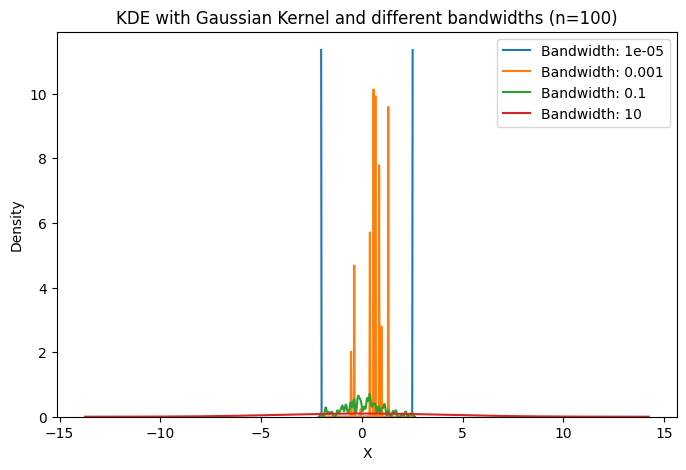

In [66]:
# n = 100 realizations
X_3 = np.random.normal(0, 1, n)
KDE_gaussian_plot(X_3,n)

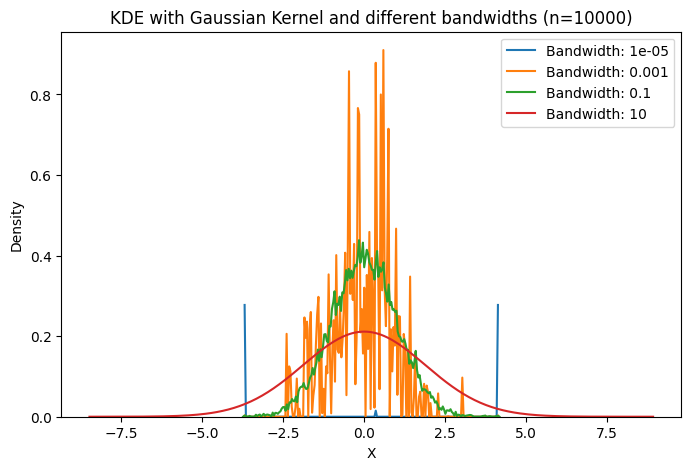

In [73]:
# n = 10000 realizations
X_4 = np.random.normal(0, 1, n_2)
KDE_gaussian_plot(X_4, n_2)

### Question 2

(a) Start with x_0 = −2 Which value of h is the best?

In [74]:
# Define a function to compute the KDE with rectangular kernel
def KDE_rectangle(X, h):
    return np.sum(0.5 * ((np.abs((X - x0) / h)) <= 1) / (n * h))

# Define a function to compute MSE criterion using Monte Carlo method
def compute_MSE(X, x0, H):
    mse_values = []
    for h in H:
        kde_values = np.array([KDE_rectangle(X, h) for _ in range(mc_iterations)])
        mse = np.mean((kde_values - true_density(x0))**2)
        mse_values.append(mse)
    return mse_values

# True density function
def true_density(x):
    return 0.5 * ((np.abs(x)) <= 1)

# Parameters
n = 100
mc_iterations = 1000
x0_values = [-2, 0.1]
H = [10**(-5), 10**(-3), 10**(-1), 10]

# Monte Carlo simulation
for x0 in x0_values:
    mse_results = compute_MSE(X, x0, H)
    best_bandwidth_index = np.argmin(mse_results)
    best_bandwidth = H[best_bandwidth_index]
    
    print(f"For x0 = {x0}:")
    print(f"The best bandwidth is: {best_bandwidth}")
    print(f"MSE criterion for the best bandwidth: {mse_results[best_bandwidth_index]}")
    print("\n")


For x0 = -2:
The best bandwidth is: 1e-05
MSE criterion for the best bandwidth: 0.0


For x0 = 0.1:
The best bandwidth is: 0.1
MSE criterion for the best bandwidth: 0.0025000000000000044




(b) Repeat the experiments with x_0 = 0.1. Same question. Is there a difference? What conclusion could you draw?


(c) Display the graph of h ∈ H → DMSE(h). Which value of h is the best? Is there a change compared to what you observed for the MSE_h(x_0)?